# Approximate $\tau_0$ and scale the burst drift

$ \tau_0 \simeq \frac{b}{\cos\theta} $ Where $b$ is the minor axis of the gaussian fit to the burst autocorrelation.
Then, if $d\nu_{\text{obs}} / dt_{\text{obs}}$ is the burst drift, we expect 


### $\frac{d\nu_{\text{obs}}}{dt_{\text{obs}}}=\frac{\nu_{\text{obs}}^{2}}{\nu_{0}\tau_{0}}\simeq\frac{\nu_{\text{obs}}^{2}b}{\nu_{0}\cos\theta}$

In [283]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd

bursts = pd.read_csv('bursts.csv')

In [286]:
bursts

,filename,name,edge,angle,peak,sigmax,sigmay,Slope,drift (mhz/ms),drift error (mhz/ms),center,center_f,time_res,freq_res,char_tau_0,drift_abs,min_sigma,sigma_t,tau_0,drift_corr
0,01_puppi_57747_C0531+33_0558_5.dm559.72.calibP...,M1,1525,1.720000,10429.0,173.731526,47.364587,-6.652439,-1039.308995,0.617101,228.755888,4458.212325,0.000010,1.562500,0.000438,1039.308995,47.364587,0.000485,0.000490,912.782584
1,02_puppi_57747_C0531+33_0558_1183.dm559.72.cal...,M2,1850,1.780000,5692.0,177.080918,44.911875,-4.736866,-739.419463,1.279131,209.060564,4427.438381,0.000010,1.562500,0.000438,739.419463,44.911875,0.000460,0.000470,677.461107
2,03_puppi_57747_C0531+33_0558_1202.dm559.72.cal...,M3,1975,1.620000,5668.0,169.749001,19.463885,-19.669528,-2813.966383,5.239849,249.051665,4489.924477,0.000010,1.562500,0.000438,2813.966383,19.463885,0.000199,0.000200,6074.240438
3,04_puppi_57747_C0531+33_0558_25437.dm559.72.ca...,M4,1450,1.710000,5038.0,160.360329,26.706231,-7.137257,-1109.319273,40.321594,322.029396,4603.952181,0.000010,1.562500,0.000438,1109.319273,26.706231,0.000273,0.000276,1730.417951
4,05_puppi_57747_C0531+33_0558_3683.dm559.72.cal...,M5,1450,1.639204,5031.0,37.747383,166.280492,-14.595503,-2109.819670,124.715830,214.396765,4435.776195,0.000010,1.562500,0.000438,2109.819670,37.747383,0.000387,0.000387,2345.687042
5,06_puppi_57747_C0531+33_0558_3687.dm559.72.cal...,M6,1150,1.590000,5569.0,156.557708,12.416683,-52.066970,-6317.730503,30.736619,263.938012,4513.184394,0.000010,1.562500,0.000438,6317.730503,12.416683,0.000127,0.000127,21399.516421
6,07_puppi_57747_C0531+33_0558_3688.dm559.72.cal...,M7,1590,1.720000,5821.0,102.259272,38.969184,-6.652439,-1028.172298,2.175251,160.167242,4351.042566,0.000010,1.562500,0.000438,1028.172298,38.969184,0.000399,0.000404,1097.541626
7,08_puppi_57747_C0531+33_0558_3689.dm559.72.cal...,M8,2000,1.990000,5666.0,171.395398,64.792725,-2.244076,-340.010864,0.162096,296.067560,4563.386812,0.000010,1.562500,0.000438,340.010864,64.792725,0.000663,0.000726,201.633383
8,09_puppi_57747_C0531+33_0558_3690.dm559.72.cal...,M9,1600,2.240000,5041.0,133.024941,89.628038,-1.264288,-191.824534,9.704662,216.215087,4438.617323,0.000010,1.562500,0.000438,191.824534,89.628038,0.000918,0.001170,70.612213
9,10_puppi_57747_C0531+33_0558_12568.dm559.72.ca...,M10,800,1.750000,5132.0,130.605616,47.074113,-5.470689,-846.471217,34.730967,310.581676,4586.065119,0.000010,1.562500,0.000438,846.471217,47.074113,0.000482,0.000490,744.299066


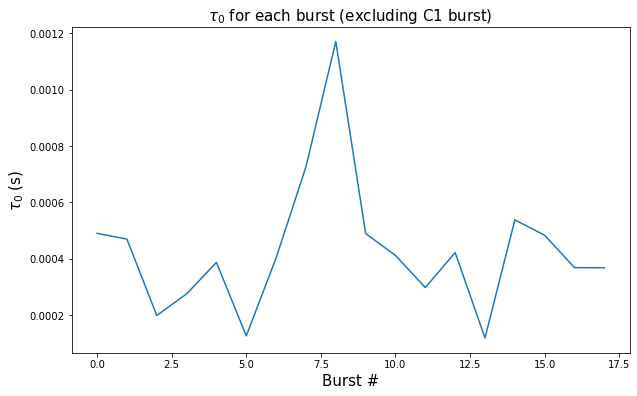

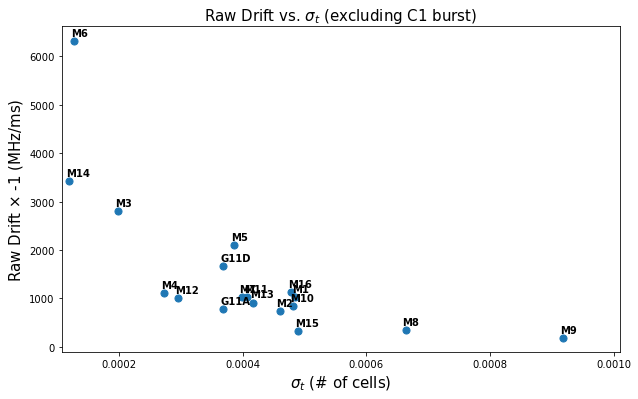

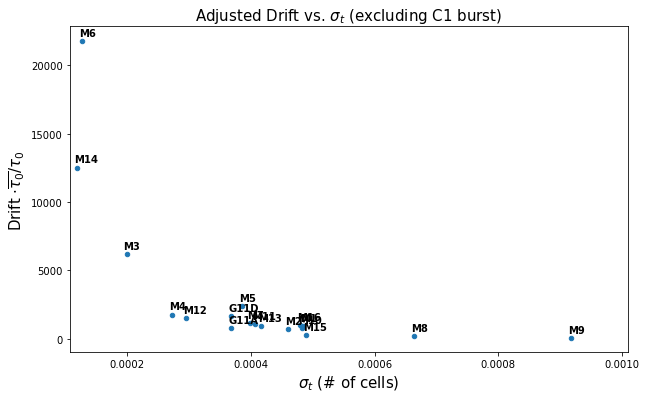

In [290]:
bursts['drift_abs'] = abs(bursts['drift (mhz/ms)'])
bursts['min_sigma'] = bursts[['sigmax','sigmay']].apply(lambda row: min(row['sigmax'], row['sigmay']), axis=1)
bursts['sigma_t']   = bursts[['min_sigma','time_res']].apply(lambda row: row['min_sigma']*row['time_res'], axis=1)
bursts['tau_0'] = bursts['sigma_t'] / np.cos(bursts['angle'] - np.pi/2)
# bursts['tau_0'] = bursts['min_sigma'] / np.cos(bursts['angle'] - np.pi/2)
bursts['drift_corr'] = (bursts['drift_abs'] / bursts['tau_0']) * bursts['char_tau_0']
numbursts = 18
fontsize=15

ax = bursts['tau_0'].head(18).plot(figsize=(10,6))
ax.set_title("$\\tau_0$ for each burst (excluding C1 burst)", size=fontsize)
ax.set_ylabel('$\\tau_0$ (s)', size=fontsize)
ax.set_xlabel('Burst #', size=fontsize)
plt.savefig('tau0.png')

ax = bursts.head(numbursts).plot.scatter(x='sigma_t', y='drift_abs', figsize=(10, 6), s=50)
for k, v in bursts.head(numbursts).iterrows():
    ax.annotate(v['name'], (v['sigma_t'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_xlim(0.9*min(bursts.head(numbursts)['sigma_t']), 1.1*max(bursts.head(numbursts)['sigma_t']))
ax.set_title('Raw Drift vs. $\sigma_t$ (excluding C1 burst)', size=fontsize)
ax.set_xlabel('$\sigma_t$ (# of cells)', size=fontsize)
ax.set_ylabel('Raw Drift $\\times$ -1 (MHz/ms)', size=fontsize)
plt.savefig('drift_vs_sigmat.png')

ax = bursts.head(numbursts).plot.scatter(x='sigma_t', y='drift_corr', figsize=(10, 6))
for k, v in bursts.head(numbursts).iterrows():
    ax.annotate(v['name'], (v['sigma_t'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_xlim(0.9*min(bursts.head(numbursts)['sigma_t']), 1.1*max(bursts.head(numbursts)['sigma_t']))
ax.set_title('Adjusted Drift vs. $\sigma_t$ (excluding C1 burst)', size=fontsize)
ax.set_xlabel('$\sigma_t$ (# of cells)', size=fontsize)
ax.set_ylabel('Drift $\cdot \overline{\\tau_{0}}/\\tau_{0}$', size=fontsize)
plt.savefig('adjusted_vs_sigmat.png')

<Figure size 432x288 with 0 Axes>

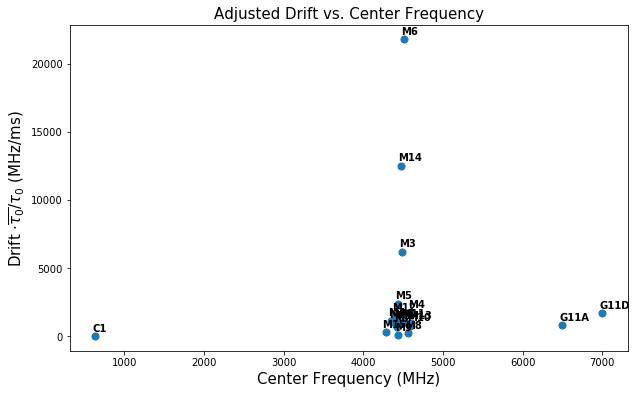

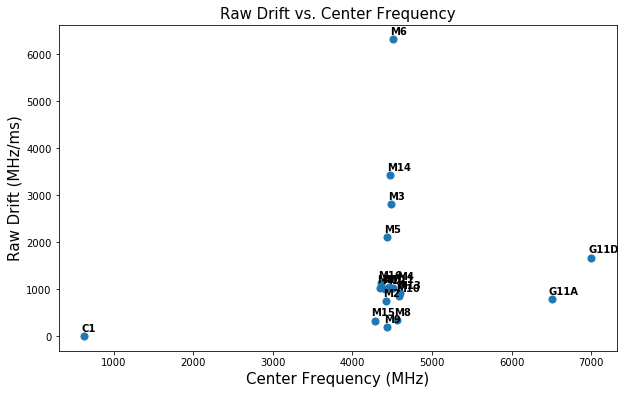

In [291]:
bursts['drift_corr']
bursts['drift_predicted'] = - bursts['center_f']**2 / bursts['tau_0']
plt.figure()
ax = bursts.plot.scatter(x='center_f', y='drift_corr', s=50, figsize=(10,6))
for k, v in bursts.iterrows():
    ax.annotate(v['name'], (v['center_f'], v['drift_corr']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_title('Adjusted Drift vs. Center Frequency', size=fontsize)
ax.set_xlabel('Center Frequency (MHz)', size=fontsize)
ax.set_ylabel('Drift $\cdot \overline{\\tau_{0}}/\\tau_{0}$ (MHz/ms)', size=fontsize)
plt.savefig('adjusted_vs_center.png')

ax = bursts.plot.scatter(x='center_f', y='drift_abs', s=50, figsize=(10,6))
for k, v in bursts.iterrows():
    ax.annotate(v['name'], (v['center_f'], v['drift_abs']), xytext=(-3,5), textcoords='offset points', weight='bold')
ax.set_title('Raw Drift vs. Center Frequency', size=fontsize)
ax.set_xlabel('Center Frequency (MHz)', size=fontsize)
ax.set_ylabel('Raw Drift (MHz/ms)', size=fontsize)
plt.savefig('rawdrift_vs_center.png')